**JT Graass and Alex Wassel's Computer Vision Final Project**

# **Data Preparation and Cleaning**

We used the MNIST Sign Language dataset from Kaggle. These images of hands in various letter formations have only one color channel.

In [0]:
import numpy as np
import tensorflow as tf
# from datasets import sign_language
import matplotlib.pyplot as plt
np.random.seed(42)
# import kaggle
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras import optimizers
from keras import losses
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras import backend as K
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout

In [0]:
train = pd.read_csv('./sign_mnist_train.csv')
test = pd.read_csv('./sign_mnist_test.csv')

In [209]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


In [210]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [211]:
print("Train set shape:", train.shape)
print("Test set shape: ", test.shape)

Train set shape: (27455, 785)
Test set shape:  (7172, 785)


In [0]:
X_train = train.drop(['label'], axis=1).values
y_train = train['label'].values
X_test = test.drop(['label'], axis=1).values
y_test = test['label'].values

In [213]:
print(X_train.shape)
print(y_train.shape)

(27455, 784)
(27455,)


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [215]:
print(X_train.shape)

(27455, 28, 28, 1)


Some basic preprocessing of data to make training the models easier.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train /= 255
X_test /= 255

So the labels range of 0 to 24, implying 25 possible letters.

In [218]:
max_ind = 0
for i in range(0, len(y_test)):
  if y_test[i] > max_ind:
    max_ind = y_test[i]
print(max_ind)
# SO 24 IS THE MAX INDICE

24


Here we had to add dummies to create a numerical representation of categories. This was necessary for some of the models but not for others. Thus, we did two separate train_test_splits. 

In [0]:
# this whole get dummies thing is messing up a lot of models
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

In [0]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)

In [0]:
X_train, X_val_dummies, y_train, y_val_dummies = train_test_split(X_train, y_train_dummies, random_state=42, stratify=y_train_dummies)

So we have multiple data subsets that we need to organize.


1.   X_train and y_train match with dummies
        - X_val_dummies and y_val_dummies
2.   X_test and y_test dummies should be used for this set
3.   X_train_sub and y_train_sub match with normal label sets
        - X_val and y_val
4.   X_test and y_test are pure - with one label





In [222]:
print(X_train[1].shape)
# So images are 28x28x1, grayscale

(28, 28, 1)


# **Model 1 - CNN.** Below is the CNN model that inspired our work. We copied it from the website below and used it as a benchmark for our own models. 

In [276]:
# CNN model from https://medium.com/the-research-nest/applied-machine-learning-part-2-a4ba715649d1
model = Sequential()
model.add(Conv2D(8, (3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))
# model.add(Dense(1, activation='softmax'))
# model.add(Dense(25, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               51328     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)              

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [278]:
print(X_train.shape)
print(y_train.shape)
print(X_val_dummies.shape)
print(y_val_dummies.shape)

(20591, 28, 28, 1)
(20591, 24)
(6864, 28, 28, 1)
(6864, 24)


In [279]:
history = model.fit(X_train, y_train, validation_data = (X_val_dummies, y_val_dummies), epochs=50, batch_size=512)

Train on 20591 samples, validate on 6864 samples
Epoch 1/50
20591/20591 [==============================] - 7s 351us/step - loss: 3.1090 - acc: 0.1054 - val_loss: 2.9388 - val_acc: 0.2823
Epoch 2/50
20591/20591 [==============================] - 6s 298us/step - loss: 2.5502 - acc: 0.2829 - val_loss: 1.9626 - val_acc: 0.4846
Epoch 3/50
20591/20591 [==============================] - 6s 298us/step - loss: 1.7749 - acc: 0.4538 - val_loss: 1.2982 - val_acc: 0.6761
Epoch 4/50
20591/20591 [==============================] - 6s 300us/step - loss: 1.3232 - acc: 0.5810 - val_loss: 0.9456 - val_acc: 0.7453
Epoch 5/50
20591/20591 [==============================] - 6s 299us/step - loss: 1.0409 - acc: 0.6740 - val_loss: 0.7138 - val_acc: 0.8207
Epoch 6/50
20591/20591 [==============================] - 6s 302us/step - loss: 0.8444 - acc: 0.7337 - val_loss: 0.5832 - val_acc: 0.8568
Epoch 7/50
20591/20591 [==============================] - 6s 300us/step - loss: 0.7117 - acc: 0.7753 - val_loss: 0.4614 - v

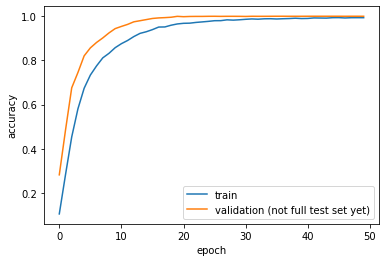

In [281]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation (not full test set yet)'])
plt.show()

In [282]:
# X_test_yo = np.reshape(X_test, (7172, 28*28))
# predictions = model.predict(X_test_yo)
print(X_test.shape)
print(y_test_dummies.shape)

(7172, 28, 28, 1)
(7172, 24)


In [283]:
score = model.evaluate(X_test, y_test_dummies, verbose=1)
print('test loss: ', score[0])
print('test accuracy: ', score[1])

7172/7172 [==============================] - 1s 183us/step
test loss:  0.29532248571377956
test accuracy:  0.9287506971556051


In [0]:
# from sklearn.metrics import accuracy_score
# test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
# print("The test accuracy is: ", test_accuracy)

In [229]:
print(X.shape)

(20591, 784)


In [0]:
# from sklearn.svm import SVC
# svm = SVC(kernel="rbf")
X = X_train.copy()
y = y_train.copy()
X = np.reshape(X, (20591, 28*28))

# y_store = np.zeros((y.shape[0],1))
# for i in range(0, y.shape[0]):
#   print("i", i, "y[i]", y[i])
#   # y_store[i] = np.argmax(y[i])
# # X = X.reshape(-1, 1)
# X = np.reshape(X, (15443, 28*28))
# # y = y.flatten(0)
# print(X.shape)
# print(y.shape)
# # y = y.reshape(1,-1)
# svm.fit(X, y)

# **Model 2 - MLP Classifier.** Below is our MLP Classifier that achieved a test accuracy of 58.9%

In [231]:
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier()
# neural_net.fit(X_train.reshape(1, -1), y_train.reshape(1,-1))
neural_net.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [237]:
print(X_test.shape)

(7172, 28, 28, 1)


In [240]:
from sklearn.metrics import accuracy_score
X_test_reshape = np.reshape(X_test, (7172, 28*28))
y_pred = neural_net.predict(X_test_reshape)
X_val_2 = X_val_dummies.copy()
X_val_2 = np.reshape(X_val_2, (6864, 28*28))
y_pred_2 = neural_net.predict(X_val_2)
y_val_2 = y_val_dummies.copy()
print("MLP Classifier's Test Set Accuracy:  ", 100*accuracy_score(y_val_2, y_pred_2), "%")
print("MLP Classifier's Test Set Accuracy:  ", 100*accuracy_score(y_test_dummies, y_pred), "%")

MLP Classifier's Test Set Accuracy:   99.83974358974359 %
MLP Classifier's Test Set Accuracy:   58.88176240936978 %


In [0]:
# from sklearn.neighbors import KNeighborsClassifier

# k_neighbors = KNeighborsClassifier(n_neighbors = 2)

# **Model 3 - Simple Neural Network.** Below is our simple neural network from scratch. Its test accuracy is incredibly low ~2-3%




In [248]:
import keras
X_train_2 = np.reshape(X_train_sub, (X_train_sub.shape[0], 28*28))
y_train_2 = y.copy()
# y_train_2 = y_train_sub.copy()
print("y_train_2 shape", y_train_2.shape)
inp = keras.layers.Input(shape=X_train_2.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(inp)
# hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# concat = keras.layers.concatenate([input_, hidden1])
output = keras.layers.Dense(24)(hidden1)
model = keras.models.Model(inputs=[inp], outputs=[output])

y_train_2 shape (20591, 24)


In [0]:
# X_val_2 = np.reshape(X_val_2, (6864, 28*28))
# print(X_val_2.shape)

In [250]:
print(y_val_2.shape)
learning_rate = 0.3
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=learning_rate), metrics = ["accuracy"])
history = model.fit(X_train_2, y_train_2, epochs=40, validation_data=(X_val_2, y_val_2))

(6864, 24)
Train on 20591 samples, validate on 6864 samples
Epoch 1/40
20591/20591 [==============================] - 2s 92us/step - loss: 0.0444 - acc: 0.0421 - val_loss: 0.0399 - val_acc: 0.0408
Epoch 2/40
20591/20591 [==============================] - 1s 56us/step - loss: 0.0399 - acc: 0.0442 - val_loss: 0.0399 - val_acc: 0.0459
Epoch 3/40
20591/20591 [==============================] - 1s 55us/step - loss: 0.0399 - acc: 0.0451 - val_loss: 0.0399 - val_acc: 0.0473
Epoch 4/40
20591/20591 [==============================] - 1s 56us/step - loss: 0.0399 - acc: 0.0444 - val_loss: 0.0399 - val_acc: 0.0473
Epoch 5/40
20591/20591 [==============================] - 1s 55us/step - loss: 0.0399 - acc: 0.0460 - val_loss: 0.0399 - val_acc: 0.0420
Epoch 6/40
20591/20591 [==============================] - 1s 56us/step - loss: 0.0399 - acc: 0.0446 - val_loss: 0.0399 - val_acc: 0.0437
Epoch 7/40
20591/20591 [==============================] - 1s 57us/step - loss: 0.0399 - acc: 0.0464 - val_loss: 0.0399

In [251]:
print(y_test.shape)
X_test_2 = np.reshape(X_test, (7172, 28*28))
y_test_2 = np.reshape(y_test_dummies, (y_test_dummies.shape[0], 24))
# history = model.fit(X_train_2, y_train_2, epochs=40, validation_data=(X_test_2, y_test_2))

(7172,)


In [255]:
score = model.evaluate(X_test_2, y_test_dummies, verbose=1)
print("Our simple Neural Network's test loss: ", score[0])
print("Our simple Neural Network's test accuracy:", score[1])

7172/7172 [==============================] - 0s 27us/step
Our simple Neural Network's test loss:  0.04001228104522623
Our simple Neural Network's test accuracy: 0.022587841606246516


# **Model 4 - Random Forest Classifier.** Below is our Random Forest Classifier whose performance is also atrocious. 

In [256]:
# MY ATTEMPT AT A RANDOM FOREST CLASSIFIER
# A random forest calssifier is a an ensemble of decision trees
#   that are usually trained with bagging.
#   Usually RFC train by splitting on the best feature
#   but we can introduce extra randomness by searching
#   for the best feature among a random subset of features
#   this leads to greater tree diversity. This trades higher bias for lower variance
from sklearn.ensemble import RandomForestClassifier

random_classifier = RandomForestClassifier(n_estimators=500,
                                           max_leaf_nodes=24,
                                           n_jobs=-1,
                                           random_state=42)
# history = random_classifier.fit(X_train_2,y_train_2, validation_data=(X_test_2, y_test_2))
random_classifier.fit(X_train_2,y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [257]:
rando_predict = random_classifier.predict(X_test_2)
rando_predict_train = random_classifier.predict(X_train_2)
print("Our Random Forest Classifier's Train Accuracy:  ", accuracy_score(y_train_2, rando_predict_train))
print("Our Random Forest Classifier's Test Accuracy:  ", accuracy_score(y_test_2, rando_predict))

Our Random Forest Classifier's Train Accuracy:   0.0
Our Random Forest Classifier's Test Accuracy:   0.0


# **Model 5 - Bagging Classifier.** Below is our Bagging Classifier that has a test accuracy of 69.9%

In [268]:
# MY ATTEMPT AT A BAGGING CLASSIFIER
# BAGGING TAKES RANDOM SAMPLES FROM THE TRAINING SET
# AND TRAINS ON THOSE, AND PUTS THOSE SAMPLES BACK
# IT DOES THIS MULTIPLE TIMES SO THAT IT TRAINS MULTIPLE MODELS
# THEN USES THE VOTES FROM ALL THESE MODELS TO DECIDE OUTPUT
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# print(X_train_2.shape)
X_test_2 = np.reshape(X_test, (7172, 28*28))
X_train_sub_2 = np.reshape(X_train_sub, (20591, 28**2))
bagging_classifier = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
                           max_samples=1000, bootstrap=True, n_jobs=-1,
                           random_state=42)
bagging_classifier.fit(X_train_sub_2, y_train_sub)
y_pred_bag = bagging_classifier.predict(X_test_2)
print("Our Bagging Classifier's Test Accuracy:  ", accuracy_score(y_test, y_pred_bag))

Our Bagging Classifier's Test Accuracy:   0.6985499163413273


In [267]:
print(X_test.shape)

(7172, 28, 28, 1)


# **Model 6 - Voting Classifier.** Below is our Voting Classifier that achieved test accuracy of 74.1%

In [271]:
# OUR ATTEMPT AT A SOFT VOTING CLASSIFIER
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), 
                ('rf', rnd_clf),
                ('svc', svm_clf)],
                voting='soft')
voting_clf.fit(X_train_sub_2, y_train_sub)
vote_pred = voting_clf.predict(X_test_2)
print("Our Voting Classifier's Test Accuracy:", accuracy_score(y_test, vote_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Our Voting Classifier's Test Accuracy: 0.7409369771332962


# **Predicting Images Examples.** Below we present two examples of the Voting Classifier correctly predicting labels. 

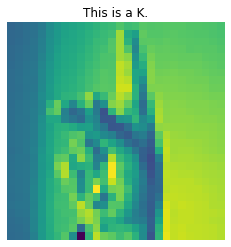

And the model predicts it as a K


In [290]:
from matplotlib import pyplot as plt
categories = ['A','B','C','D','E','F',
              'G','H','I','J','K','L','M','N',
              'O','P','Q','R','S','T','U','V',
              'W','X','Y','Z']
indy = 2
image = X_test[indy]
image = image.squeeze()
plt.figure()
plt.title('This is a %s.' % categories[y_test[indy]])
plt.imshow(image); plt.grid(False); plt.axis('off'); plt.show()
print('And the model predicts it as a', categories[vote_pred[indy]])

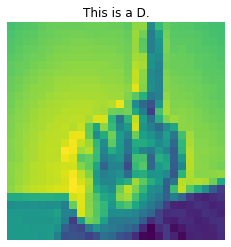

And the model predicts it as a D


In [293]:
indy = 4
image = X_test[indy]
image = image.squeeze()
plt.figure()
plt.title('This is a %s.' % categories[y_test[indy]])
plt.imshow(image); plt.grid(False); plt.axis('off'); plt.show()
print('And the model predicts it as a', categories[vote_pred[indy]])

And below we have two examples where the Voting Classifier incorrectly predicts the label.

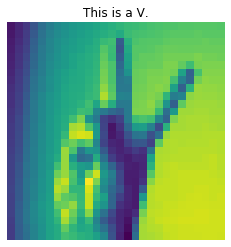

And the model predicts it as a W


In [294]:
indy = 5
image = X_test[indy]
image = image.squeeze()
plt.figure()
plt.title('This is a %s.' % categories[y_test[indy]])
plt.imshow(image); plt.grid(False); plt.axis('off'); plt.show()
print('And the model predicts it as a', categories[vote_pred[indy]])

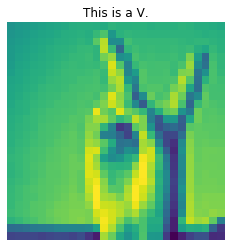

And the model predicts it as a R


In [302]:
indy = 12
image = X_test[indy]
image = image.squeeze()
plt.figure()
plt.title('This is a %s.' % categories[y_test[indy]])
plt.imshow(image); plt.grid(False); plt.axis('off'); plt.show()
print('And the model predicts it as a', categories[vote_pred[indy]])